# Question 1

First we create and plot the data.

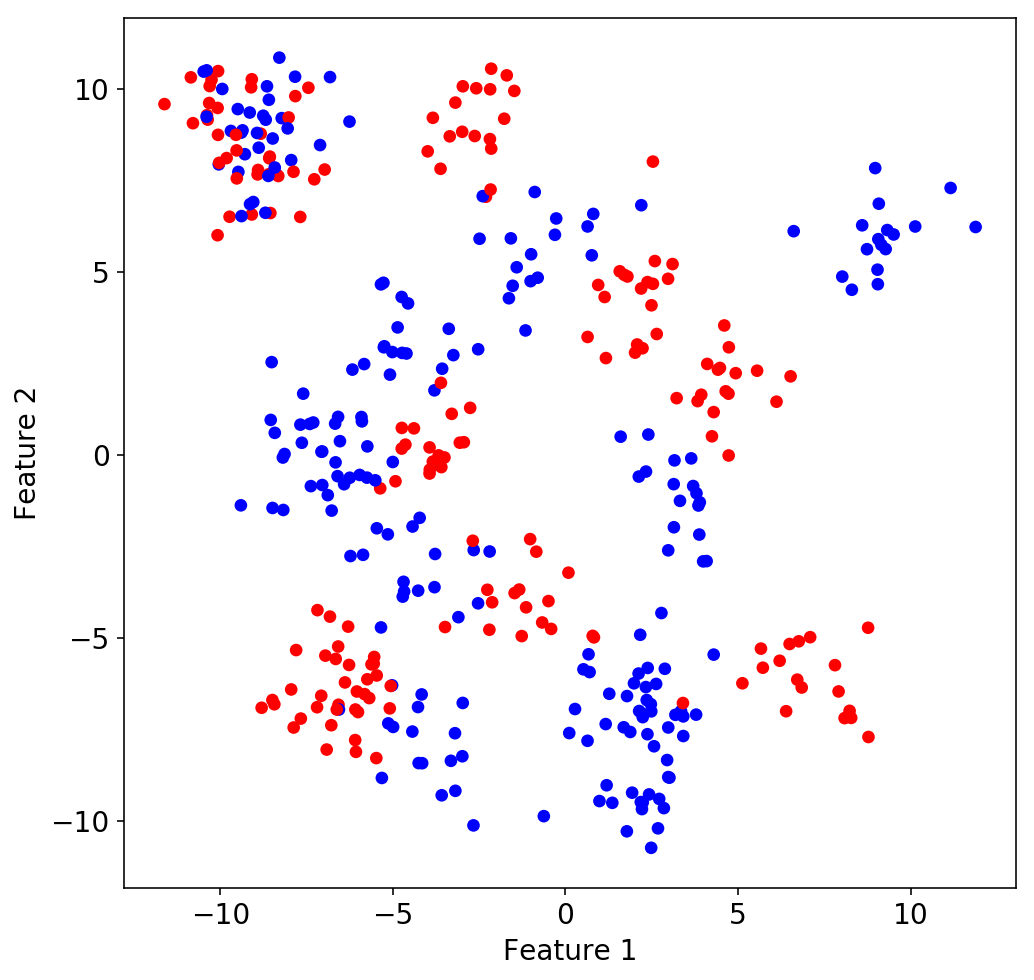

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state
from sklearn.datasets import make_blobs

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

# Question 2

In order to find the best possible model, the following strategy will be applied: First, we split the data into a training and a test set. Then, we optimse on the training dataset either the parameter 'max_leaf_nodes' or 'max_depth' for a single tree. Then using this optimum parameter, we optimise the number of estimators for the random forest on this same dataset. Finally, we estimate the performance of the random forest with these best parameters on the test dataset.

/home/lino/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/lino/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


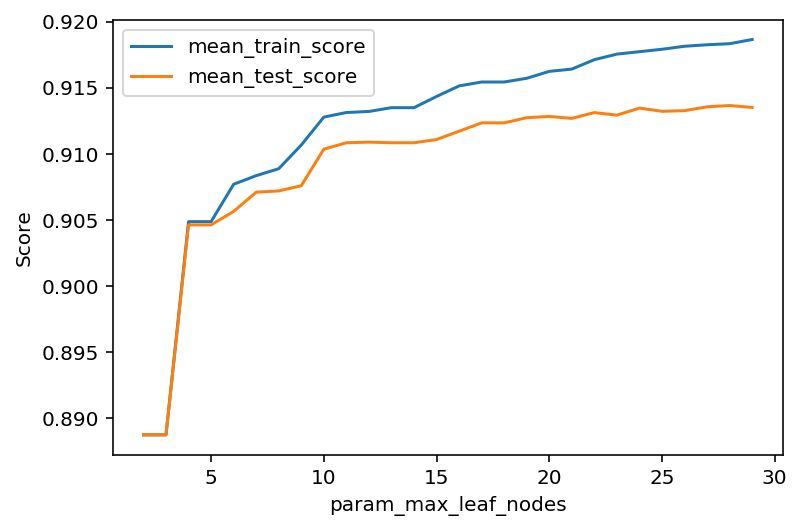

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from utils import draw_tree

import csv
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

Data = pd.read_csv('bank-additional-full.csv', delimiter=";")
X = Data.as_matrix()[:,:20]
y = Data.as_matrix()[:,20]

# First we need to transform the strings into ints

k = LabelEncoder()
k.fit(y)
y = k.transform(y)

Strings_indices = [1,2,3,4,5,6,7,8,9,14]

Label = LabelEncoder()

for i in Strings_indices:
    Label.fit(X[:,i])
    X[:,i] = Label.transform(X[:,i])
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

param_grid = {'max_leaf_nodes':range(2, 30)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    param_grid=param_grid,
                    cv=10,
                    return_train_score=True,
                    #scoring='roc_auc'
                )

grid.fit(X_train, y_train)
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes',y=['mean_train_score', 'mean_test_score'],)
plt.legend(loc='best')
plt.ylabel('Score');
plt.savefig("images/dt_max_leaf_nodes_cv.png")

We choose max_leaf_nodes = 10 as the best parameter for a single tree. Now we will search for the best number of estimators for a random forest using max_leaf_nodes = 10.





/home/lino/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


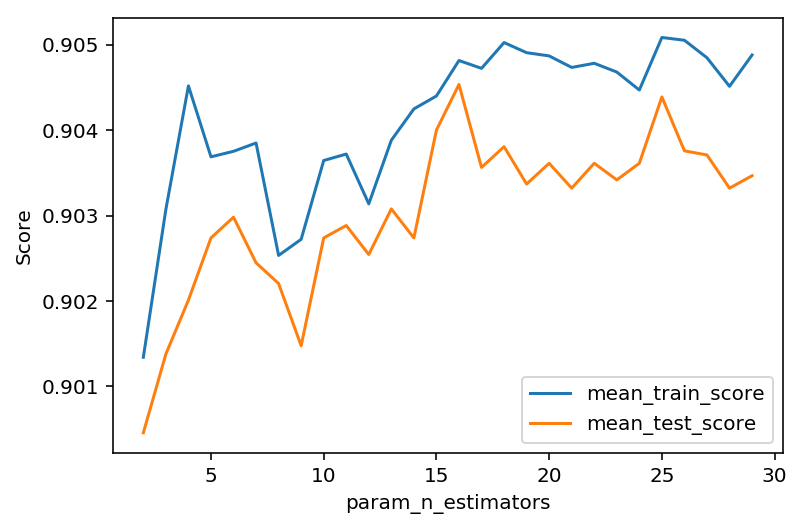

In [84]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators':range(2, 30)}
grid = GridSearchCV(RandomForestClassifier(random_state=0, max_leaf_nodes = 10),
                    param_grid=param_grid,
                    cv=10,
                    return_train_score=True,
                    #scoring='roc_auc'
                )
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_n_estimators',
            y=['mean_train_score', 'mean_test_score'],
           )
plt.legend(loc='best')
plt.ylabel('Score');
plt.savefig("images/dt_n_estimators_cv.png")

We find that best number of estimators is 16. Using this parameter we can estimate the score of the random forest on the test dataset.

In [91]:
Forest = RandomForestClassifier(n_estimators=16, max_leaf_nodes=10, random_state=1)
Forest.fit(X_train, y_train)

train_scores = Forest.score(X_train, y_train)
test_scores = Forest.score(X_test, y_test)
print("The performances are : \nTraining = {:.3f}".format(train_scores))
print("Testing = {:.3f}".format(test_scores))

Prediction by forest ['no' 'no' 'no']
The performances are : 
Training = 0.905
Testing = 0.904


# Question 3

[4.526 3.585 3.521 ... 0.923 0.847 0.894]
[4526 3585 3521 ...  923  847  894]


/home/lino/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/lino/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


KeyboardInterrupt: 

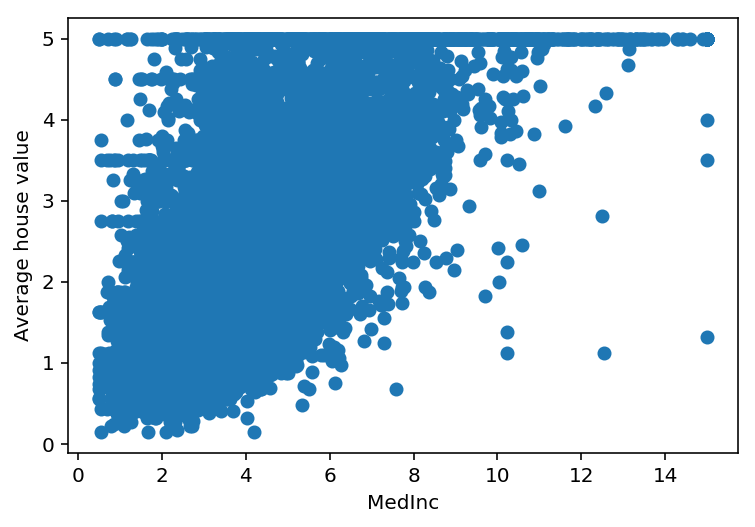

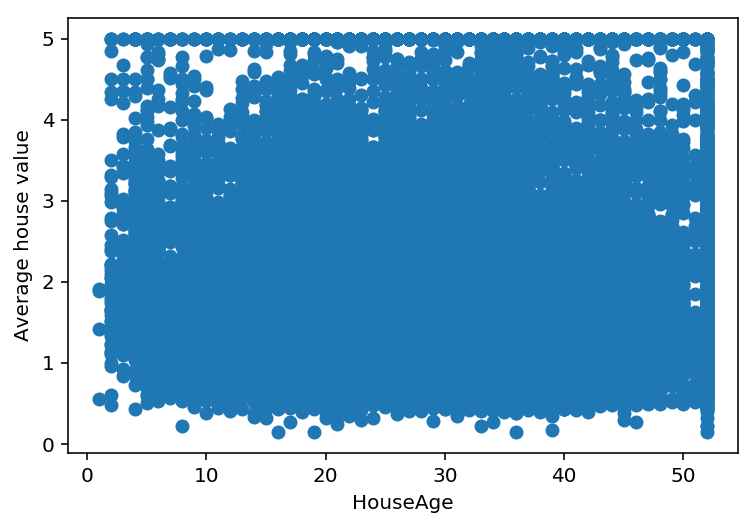

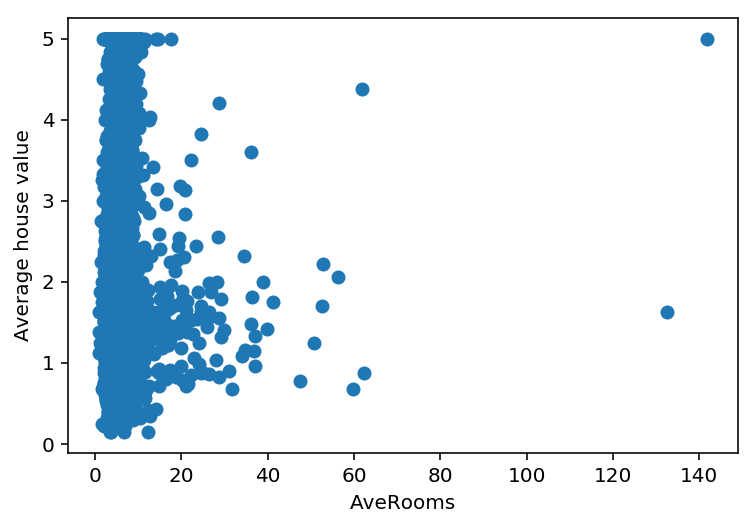

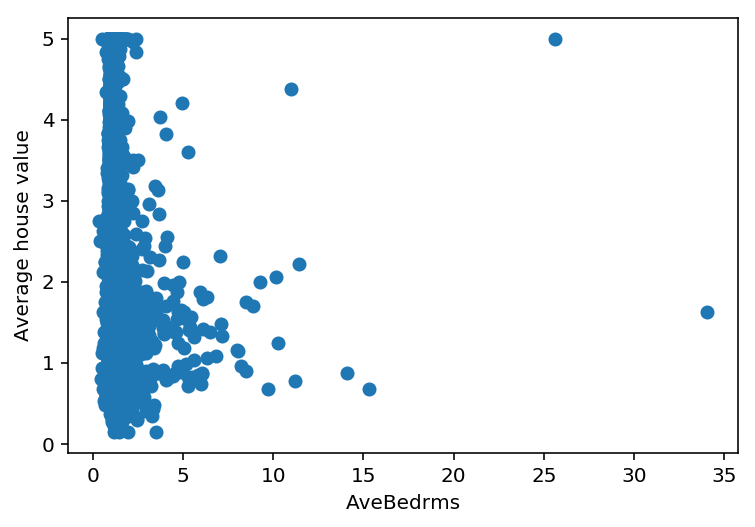

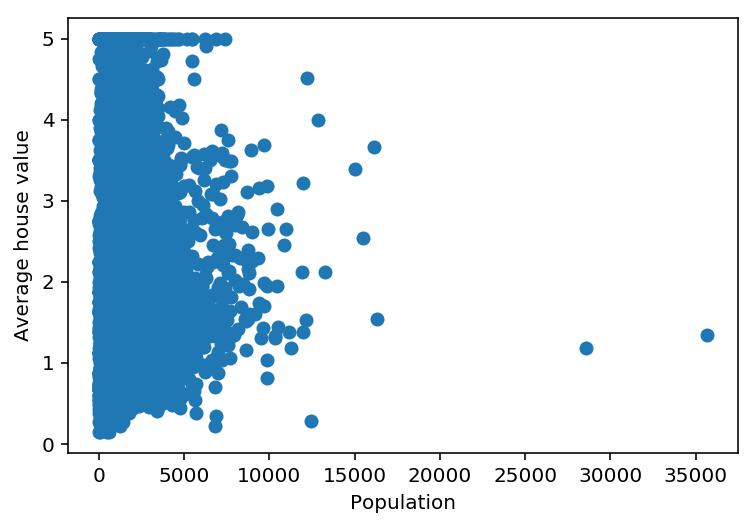

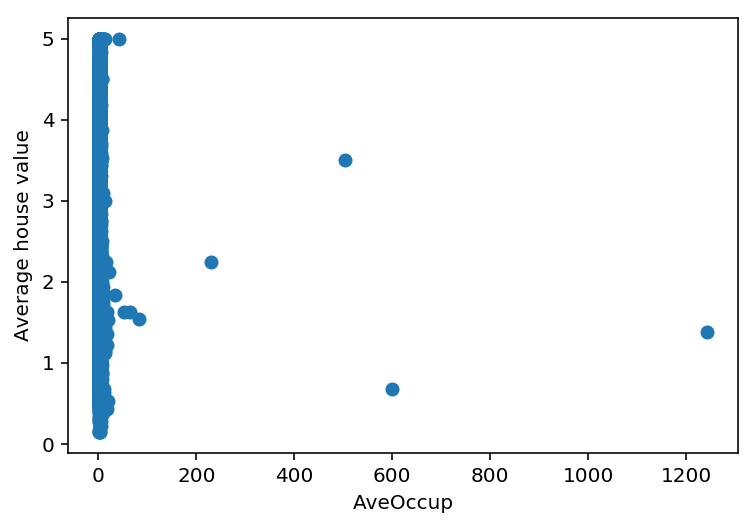

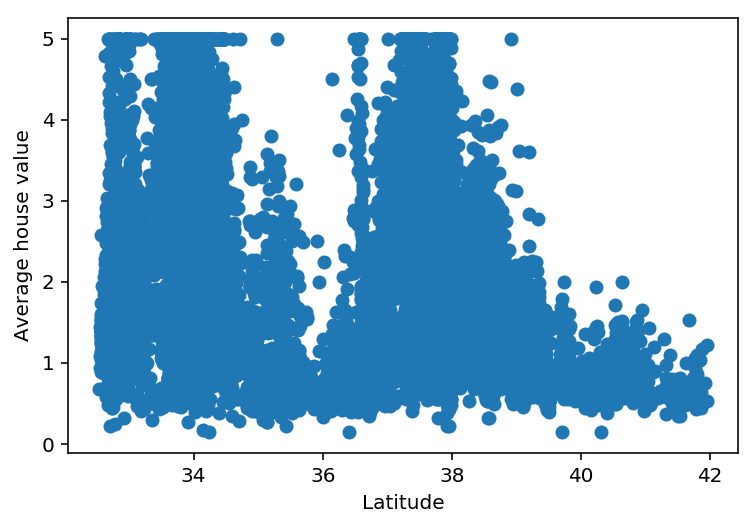

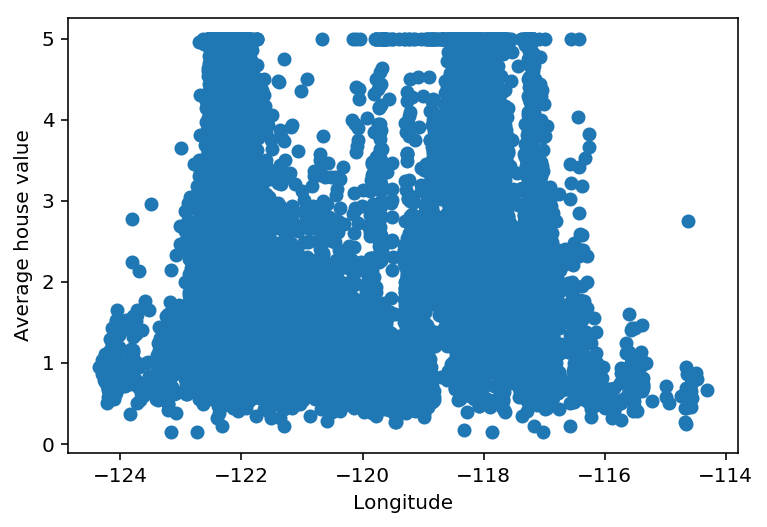

In [133]:
from sklearn.datasets.california_housing import fetch_california_housing

cal_housing = fetch_california_housing()

# if the above doesn't work, download `cal_housing_py3.pkl` from the GitHub repository
# and adjust the path to the downloaded file which is passed to `load()`
# uncomment the following lines
#from sklearn.externals.joblib import load
#d = load('/home/lino/Desktop/Advanced_computing_techniques/Advanced_computing/cal_housing_py3.pkz')
#X, y = d[:,1:], d[:,0]/100000
#X[:, 2] /= X[:, 5]
#X[:, 3] /= X[:, 5]
#X[:, 5] = X[:, 4] / X[:, 5]

Features = cal_housing['feature_names']
y = cal_housing['target']
#print(cal_housing)
X = cal_housing['data']

for i in range(0,len(Features)):
    plt.figure()
    plt.scatter(X[:,i], y[:])
    plt.xlabel(Features[i])
    plt.ylabel('Average house value')

# Transform the target values into ints
y = 1000 * y
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
n_estimators = [1,10,20,30,40,50,75,100,200]
param_grid = {'n_estimators':n_estimators}#, {'max_leaf_nodes':range(2,30)}]
param_grid_leaf_nodes = {'max_leaf_nodes':range(2,30)}

grid = GridSearchCV(RandomForestClassifier(random_state=0, max_leaf_nodes = 27),
                    param_grid=param_grid,
                    cv=10,
                    return_train_score=True,
                    #scoring='roc_auc'
                )
grid.fit(X_train, y_train)
print("Best parameters are: ")
print(grid.best_params_)
print("Corresponding best score: {:.2f}".format(grid.best_score_))

grid = GridSearchCV(ExtraTreesClassifier(random_state=0),
                    param_grid=param_grid_leaf_nodes,
                    cv=10,
                    return_train_score=True,
                    #scoring='roc_auc'
                )
grid.fit(X_train, y_train)
print("Best parameters for ExtraTreesClassifier are: ")
print(grid.best_params_)
print("Corresponding best score: {:.2f}".format(grid.best_score_))

grid = GridSearchCV(GradientBoostedTreesClassifier(random_state=0),
                    param_grid=param_grid_leaf_nodes,
                    cv=10,
                    return_train_score=True,
                    #scoring='roc_auc'
                )
grid.fit(X_train, y_train)
print("Best parameters for GradientBoostedTreesClassifier are: ")
print(grid.best_params_)
print("Corresponding best score: {:.2f}".format(grid.best_score_))


Forest = RandomForestClassifier(n_estimators=30, max_leaf_nodes=27, random_state=1)
Forest.fit(X_train, y_train)

train_scores = Forest.score(X_train, y_train)
test_scores = Forest.score(X_test, y_test)
print("The performances are : \nTraining = {:.3f}".format(train_scores))
print("Testing = {:.3f}".format(test_scores))
print("The features importances are as follows : ")
print(Forest.feature_importances_)


Extra = ExtraTreesClassifier(n_estimators=30, max_leaf_nodes=27, random_state=1)
Extra.fit(X_train, y_train)

train_scores = Extra.score(X_train, y_train)
test_scores = Extra.score(X_test, y_test)
print("The performances are : \nTraining = {:.3f}".format(train_scores))
print("Testing = {:.3f}".format(test_scores))
print("The features importances are as follows : ")
print(Extra.feature_importances_)

GBT = GradientBoostedTreesClassifier(n_estimators=30, max_leaf_nodes=27, random_state=1)
GBT.fit(X_train, y_train)

train_scores = GBT.score(X_train, y_train)
test_scores = GBT.score(X_test, y_test)
print("The performances are : \nTraining = {:.3f}".format(train_scores))
print("Testing = {:.3f}".format(test_scores))
print("The features importances are as follows : ")
print(GBT.feature_importances_)